[IEEE ICMLA 2019](https://www.icmla-conference.org/icmla19/)

[The Data Science landscape: foundations, tools, and practical applications](https://www.icmla-conference.org/icmla19/links/tutorialAM.htm)

# Machine learning and data science

In this section we will use the [Kaggle's version of the Pima Indians diabetes database](https://www.kaggle.com/uciml/pima-indians-diabetes-database):

> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset has several predictors variables (features, attributes) and one target variable (label):

> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Our goal is to use the features (attributes) in the dataset to predict the label (wheter or not a patient has diabetes).

We will use machine learning for that:

1. Load and inspect the dataset
1. Split into features and labels
1. Split into train and test datasets
1. Create and evaluate models

## 1. Loading and inspecting the dataset

In [2]:
import pandas as pd

# Note that we don't need to unzip to read the file
df = pd.read_csv('data/pima-indians-diabetes-database.zip')

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


By inspecting the dataset, we found out that:

- It has 768 rows and 9 columns (`shape`).
- The values of the columns seem to be in the range of what they are supposed to represent (`describe()`).
- There are no missing data (`info()`).

Now that we understand and trust the data, we need to check if it is balanced, i.e. if we have about the same number of samples for each label.

In [24]:
print(df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


The dataset is imbalanced, with twice as many negative (non-diabetic) than positive (diabetic) samples.

It is not extremely imbalanced, but we will need to careful when measuring the performance of the models later.

## 2. Separating features from labels

We will split the dataset into features (attributes) and the label (outcome), using the traditional `X` and `y` names for those pieces of the dataset.

In [9]:
# We can see from df.columns that `Outcome`, the label, is the last column
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## 3. Splitting into a training and a test dataset

Models must be evaluated with data they have not seen before. In other words we should [never train on test data](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data).

We will reserve a portion of the dataset to evaluate the models later. This is the _test dataset_.

In [32]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = \
    train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

A quick check to see if they are split as expected, both within each set (we expect to see about twice as many zeros than ones in each set) and across the sets (same proportion of zeros and ones across the sets).

Not that we doubt `train_test_split`, it is just in case we made a mistake somewhere else with the dataset (for example when cleaning it up). If we do not get the split right, many other things will fall apart later.

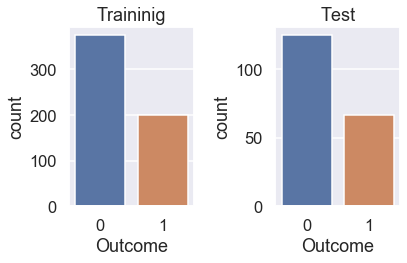

In [41]:
_, ax = plt.subplots(1,2, tight_layout=True)
sns.countplot(ytrain, ax=ax[0]).set_title('Traininig')
sns.countplot(ytest, ax=ax[1]).set_title('Test');